In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### WARM - UP

In [81]:
A = np.identity(5)
print A

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


### LINEAR REGRESSION WITH ONE VARIABLE

#### Plot Data

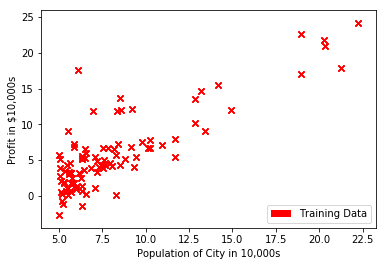

In [82]:
data = np.loadtxt('linear_regression_data/ex1data1.txt', delimiter=',')

x = data[:, 0]  # population
y = data[:, 1]  # profit

plt.scatter(x, y, color = 'r', marker = 'x')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

classes = ['Training Data']
class_colours = ['r']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0), 1, 1, fc=class_colours[i]))
plt.legend(recs, classes, loc=4)

plt.show()

#### Cost and Gradient Descent

In [83]:
# Cost
def compute_cost(X, y, theta):
    J = 0                      # cost
    m = len(y)                 # number of samples
    h = np.dot(X, theta)
    J = (float(1) / (2 * m)) * np.sum(np.square(np.subtract(h.T, y)))
    return J

In [84]:
# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros([num_iters, 1])

    for i in range(0, num_iters):
        h = np.dot(X, theta)
        h_sub_y = np.subtract(h.T, y)

        temp1 = theta[0] - alpha / m * np.sum(h_sub_y)
        temp2 = theta[1] - alpha / m * np.sum(np.multiply(h_sub_y, X[:, 1]))
        theta[0] = float(temp1[0])
        theta[1] = float(temp2[0])
        
        J_history[i] = compute_cost(X, y, theta)
    return [theta, J_history]

In [93]:
data = np.loadtxt('linear_regression_data/ex1data1.txt', delimiter=',')
iterations = 1500
alpha = 0.01
training_samples = len(data)

theta = np.zeros([2, 1])
X = np.column_stack((np.ones((training_samples, 1)), data[:, 0]))
y = data[:, 1]

# Cost
print 'TESTING COST FUNCTION:'
J = compute_cost(X, y, theta)
print 'With theta = [0 ; 0], Cost computed = ', round(J, 2)
print 'Expected cost value (approx) = 32.07 \n'

# further testing of the cost function
J = compute_cost(X, y, [[-1], [2]])
print 'With theta = [-1 ; 2]; Cost computed = ', round(J, 2)
print 'Expected cost value (approx) = 54.24 \n'

# Gradient Descent
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)
print 'TESTING GRADIENT DESCENT FUNCTION:'
print 'Theta found by gradient descent: ', round(theta[0], 4), round(theta[1], 4)
print 'Expected theta values (approx) = -3.6303  1.1664'



TESTING COST FUNCTION:
With theta = [0 ; 0], Cost computed =  32.07
Expected cost value (approx) = 32.07 

With theta = [-1 ; 2]; Cost computed =  54.24
Expected cost value (approx) = 54.24 

TESTING GRADIENT DESCENT FUNCTION:
Theta found by gradient descent:  -3.6303 1.1664
Expected theta values (approx) = -3.6303  1.1664


#### Plot Linear Fit

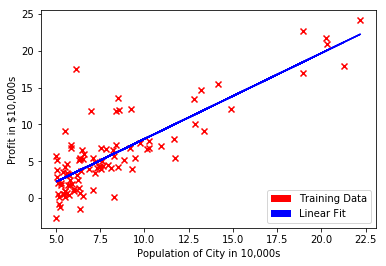

In [92]:
plt.scatter(x, y, color = 'r', marker = 'x')

profit_predictions = np.dot(X, theta)
plt.plot(x, profit_predictions, color = 'b')

plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

classes = ['Training Data', 'Linear Fit']
class_colours = ['r', 'b']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0), 1, 1, fc=class_colours[i]))
plt.legend(recs, classes, loc=4)

plt.show()

#### Predict values for population sizes of 35,000 and 70,000

In [95]:
predict1 = np.dot([1, 3.5], theta)
print 'For population = 35,000, we predict a profit of ', round(predict1*10000, 2)
predict2 = np.dot([1, 7], theta)
print 'For population = 70,000, we predict a profit of ', round(predict2*10000, 2)


For population = 35,000, we predict a profit of  4519.77
For population = 70,000, we predict a profit of  45342.45
